In [3]:
import pandas as pd
import json
import re

In [7]:
with open('gpt4/result_8.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)

# Create new columns with default values
df['yes'] = 0
df['no'] = 0
df['uncertain'] = 0

# Define a function to set the values for "yes," "no," and "uncertain"
def set_values(row):
    answer = row['answer'].lower()
    if 'yes' in answer:
        row['yes'] = 1
    if 'no' in answer:
        row['no'] = 1
    if 'uncertain' in answer:
        row['uncertain'] = 1
    return row

# Apply the function to each row
df = df.apply(set_values, axis=1)

# Filter rows where the sum is not equal to 1
filtered_df = df[df['yes'] + df['no'] + df['uncertain'] != 1]

# Print the filtered DataFrame
print(filtered_df)


                                                  test  \
198  " Creem " writer Robot A. Hull began his revie...   

                                                answer               label  \
198  Uncertain. The statement does not explicitly i...  only causal excess   

     yes  no  uncertain  
198    0   1          1  
yes


Empty DataFrame
Columns: [test, answer, label, yes, no, uncertain]
Index: []
OK.


In [22]:
# Group the DataFrame by "label" and calculate the sum for each group
grouped_df = df.groupby('label').agg({'yes': 'sum', 'no': 'sum', 'uncertain': 'sum'}).reset_index()

# Calculate the total for each group
grouped_df['total'] = grouped_df['yes'] + grouped_df['no'] + grouped_df['uncertain']

# Convert the grouped DataFrame to a JSON object
json_data = grouped_df.to_dict(orient='records')

# Save the JSON object to a file
import json
with open('distribution_8.json', 'w') as json_file:
    json.dump(json_data, json_file, indent=4)

# Print the JSON object
print(grouped_df)
print(json_data)

                label  yes  no  uncertain  total
0              causal   31   3         19     53
1       causal excess   56   2         16     74
2          non-causal    7   0         14     21
3  only causal excess   57   7         36    100
[{'label': 'causal', 'yes': 31, 'no': 3, 'uncertain': 19, 'total': 53}, {'label': 'causal excess', 'yes': 56, 'no': 2, 'uncertain': 16, 'total': 74}, {'label': 'non-causal', 'yes': 7, 'no': 0, 'uncertain': 14, 'total': 21}, {'label': 'only causal excess', 'yes': 57, 'no': 7, 'uncertain': 36, 'total': 100}]


In [61]:
with open('./gpt4/result_1.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)

# Create new columns with default values
df['entailment'] = 0
df['no entailment'] = 0
df['contradiction'] = 0

# Define a function to set the values for "yes," "no," and "uncertain"
def set_values(row):
    answer = row['answer'].lower().replace("no entailment", "no_entail")
    if 'entailment' in answer:
        row['entailment'] = 1
    if 'no_entail' in answer:
        row['no entailment'] = 1
    if 'contradiction' in answer:
        row['contradiction'] = 1
    return row

# Apply the function to each row
df = df.apply(set_values, axis=1)

# Filter rows where the sum is not equal to 1
filtered_df = df[df['entailment'] + df['no entailment'] + df['contradiction'] != 1]

# Print the filtered DataFrame
print(filtered_df)

                                                  test  \
71   premise: This was so funny that I had to buy a...   
76   premise: But Varro was apparently so guilty th...   
137  premise: Though the negative attention fades a...   
166  premise: However she became so addicted that i...   
221  premise: Film critic Roger Ebert wrote that th...   

                                                answer               label  \
71   Classify as entailment, no entailment, or cont...              causal   
76   Classify as entailment, no entailment, or cont...       causal excess   
137  Classify as entailment, no entailment, or cont...              causal   
166  Classify as entailment, no entailment, or cont...  only causal excess   
221  Classification: No entailment \n\nExplanation:...  only causal excess   

     entailment  no entailment  contradiction  
71            1              1              1  
76            1              1              1  
137           1              1        

In [11]:
l = [221]
for i in l:
    df.loc[i, 'entailment'] = 0
    df.loc[i, 'contradiction'] = 0
    df.loc[i, 'no entailment'] = 1

filtered_df = df[df['entailment'] + df['no entailment'] + df['contradiction'] != 1]
print(filtered_df)
print(df.loc[76, "answer"])

                                                  test      answer  \
0    One man was so afraid that he camped in the mi...         Yes   
1    He was so afraid that rival loyalist inmates w...         Yes   
2    He was so amazed that he forgot to thank me . ...  Uncertain.   
3    Marie is so amazed that he came up with that s...        Yes.   
4    Her uncle was so angry that he sent her to liv...        Yes.   
..                                                 ...         ...   
243  Regarding the multiplayer , IGN 's Greg Miller...         Yes   
244  In fact , after I 'd sold three novels , I fel...         Yes   
245  However , they were so brazen that Massachuset...         Yes   
246  His stay was so brief that no credit known for...   Uncertain   
247  They were so brilliant that the press assumed ...   uncertain   

                  label  yes  no  uncertain  entailment  contradiction  \
0         causal excess    1   0          0         NaN            NaN   
1          

In [78]:
# Group the DataFrame by "label" and calculate the sum for each group
grouped_df = df.groupby('label').agg({'entailment': 'sum', 'contradiction': 'sum', 'no entailment': 'sum'}).reset_index()

# Calculate the total for each group
grouped_df['total'] = grouped_df['entailment'] + grouped_df['contradiction'] + grouped_df['no entailment']

# Convert the grouped DataFrame to a JSON object
json_data = grouped_df.to_dict(orient='records')

# Save the JSON object to a file
import json
with open('./gpt4/distribution_1.json', 'w') as json_file:
    json.dump(json_data, json_file, indent=4)

# Print the JSON object
print(grouped_df)
print(json_data)

                label  entailment  contradiction  no entailment  total
0              causal          52              1              0     53
1       causal excess          68              4              2     74
2          non-causal          21              0              0     21
3  only causal excess          87              9              4    100
[{'label': 'causal', 'entailment': 52, 'contradiction': 1, 'no entailment': 0, 'total': 53}, {'label': 'causal excess', 'entailment': 68, 'contradiction': 4, 'no entailment': 2, 'total': 74}, {'label': 'non-causal', 'entailment': 21, 'contradiction': 0, 'no entailment': 0, 'total': 21}, {'label': 'only causal excess', 'entailment': 87, 'contradiction': 9, 'no entailment': 4, 'total': 100}]


In [79]:
ground_truth = {"causal": "entailment", "causal excess": "no entailment", "non-causal": "entailment", "only causal excess": "no entailment"}


In [80]:
import json

# Load the JSON data from the file
with open('./gpt4/distribution_1.json', 'r') as json_file:
    json_data = json.load(json_file)
    
for item in json_data:
    label = item['label']
    ground_truth_label = ground_truth.get(label)
    if ground_truth_label is not None:
        accuracy = item[ground_truth_label] / item['total']
        item['correct'] = ground_truth_label
        item['accuracy'] = accuracy

# Print the updated JSON data
print(json_data)
    
combined_data = {"ground_truth": ground_truth, "distribution_data": json_data}

# Save the combined data to a JSON file
with open('./gpt4/distribution_1.json', 'w') as json_file:
    json.dump(combined_data, json_file, indent=4)

[{'label': 'causal', 'entailment': 52, 'contradiction': 1, 'no entailment': 0, 'total': 53, 'correct': 'entailment', 'accuracy': 0.9811320754716981}, {'label': 'causal excess', 'entailment': 68, 'contradiction': 4, 'no entailment': 2, 'total': 74, 'correct': 'no entailment', 'accuracy': 0.02702702702702703}, {'label': 'non-causal', 'entailment': 21, 'contradiction': 0, 'no entailment': 0, 'total': 21, 'correct': 'entailment', 'accuracy': 1.0}, {'label': 'only causal excess', 'entailment': 87, 'contradiction': 9, 'no entailment': 4, 'total': 100, 'correct': 'no entailment', 'accuracy': 0.04}]


FileNotFoundError: [Errno 2] No such file or directory: 'result1.json'

Not Correct Instances for 'causal excess':
                                                  test answer           type
0        He was so amazed that he forgot to thank me .     No  causal excess
2    The decomposition of the corpse was so advance...    No.  causal excess
3    In fact , it was so technically advanced that ...     No  causal excess
10   This playing for wind was so apparent that the...    No.  causal excess
18   The family quarrel became so bitter that the D...     No  causal excess
22   This has led to mixed criticism as some wanted...     No  causal excess
24   After informing his father of his intent to sw...    No.  causal excess
36   Faber was " so despondent that he attempted su...    No.  causal excess
68   The structure was so firm that the workers had...     No  causal excess
80   Diane could n't believe that her sister and he...     No  causal excess
88   He was so indebted that he sold his Irish esta...     No  causal excess
90   Klement was so indignant tha

Results have been saved to 'evaluation2.txt'.


Not Correct Instances for 'causal excess':
                                                  test answer           type
0        He was so amazed that he forgot to thank me .    No.  causal excess
3    In fact , it was so technically advanced that ...     No  causal excess
4    One man was so afraid that he camped in the mi...     No  causal excess
10   This playing for wind was so apparent that the...     No  causal excess
14   Eusébio was so astonished at Stepney 's save t...    No.  causal excess
22   This has led to mixed criticism as some wanted...     No  causal excess
26   Shea 's defense team was so confident of acqui...     No  causal excess
38   She was so determined that she continued her t...     No  causal excess
50   When they also promise her a dog , she becomes...     No  causal excess
64   He was so excited that his hands shook as he t...     No  causal excess
70   She said , " I was so fortunate that I got to ...     No  causal excess
76   I was so grateful that I kep

In [6]:
with open('result3.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Define a function to calculate accuracy for a given type
def calculate_accuracy(df, entry_type):
    if entry_type == "non-causal":
        # Use regular expression to check if "Yes" or "yes" is NOT in the answer
        correct_answers = df[df['type'] == entry_type]['answer'].str.contains(r'No|no', flags=re.IGNORECASE)
    else:
        # Use regular expression to check if "Yes" or "yes" is in the answer
        correct_answers = df[df['type'] == entry_type]['answer'].str.contains(r'Yes|yes', flags=re.IGNORECASE)
    
    # Calculate accuracy as the ratio of correct answers to total answers for this type
    accuracy = correct_answers.sum() / len(correct_answers)
    
    result = f"Accuracy for '{entry_type}': {accuracy:.2%} ({correct_answers.sum()}/{len(correct_answers)} correct)"
    
    return accuracy, result, correct_answers.sum(), len(correct_answers)

accuracy_causal_excess, result_causal_excess, c1, t1 = calculate_accuracy(df, "causal excess")
accuracy_causal, result_causal, c2, t2 = calculate_accuracy(df, "causal")
accuracy_non_causal, result_non_causal, c3, t3 = calculate_accuracy(df, "non-causal")
accuracy_only_causal_excess, result_only_causal_excess, c4, t4 = calculate_accuracy(df, "only causal excess")

# Calculate total accuracy
total_accuracy = (c1+c2+c3+c4)/(t1+t2+t3+t4)

# Create a result string with total accuracy
result_total = f"Total Accuracy: {total_accuracy:.2%}\n"

prompt = "Is there a causal relationship between part 1 and part 2? Answer with Yes or No."
# Save results to a file
with open("evaluation3.txt", "w") as output_file:
    output_file.write("Is there a causal relationship between part 1 and part 2? Answer with Yes or No. If yes, which part is the cause, part 1 or part 2?\n")
    output_file.write(result_causal_excess + "\n")
    output_file.write(result_causal + "\n")
    output_file.write(result_non_causal + "\n")
    output_file.write(result_only_causal_excess + "\n")
    output_file.write(result_total)

print("Results have been saved to 'evaluation3.txt'.")

new = {}
new["prompt"] = prompt
new["causal excess (77)"] = "{:.2f}".format(accuracy_causal_excess*100)
new["causal (58)"] = "{:.2f}".format(accuracy_causal*100)
new["non-causal (16)"] = "{:.2f}".format(accuracy_non_causal*100)
new["only causal excess (150)"] = "{:.2f}".format(accuracy_only_causal_excess*100)
new["total (301)"] = "{:.2f}".format(total_accuracy*100)


result.append(new)

Results have been saved to 'evaluation3.txt'.


In [7]:
with open('result4.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Define a function to calculate accuracy for a given type
def calculate_accuracy(df, entry_type):
    if entry_type == "non-causal" or entry_type == "causal":
        # Use regular expression to check if "Yes" or "yes" is NOT in the answer
        correct_answers = df[df['type'] == entry_type]['answer'].str.contains(r'No|no', flags=re.IGNORECASE)
    else:
        # Use regular expression to check if "Yes" or "yes" is in the answer
        correct_answers = df[df['type'] == entry_type]['answer'].str.contains(r'Yes|yes', flags=re.IGNORECASE)
    
    # Calculate accuracy as the ratio of correct answers to total answers for this type
    accuracy = correct_answers.sum() / len(correct_answers)
    
    result = f"Accuracy for '{entry_type}': {accuracy:.2%} ({correct_answers.sum()}/{len(correct_answers)} correct)"
    
    return accuracy, result, correct_answers.sum(), len(correct_answers)

accuracy_causal_excess, result_causal_excess, c1, t1 = calculate_accuracy(df, "causal excess")
accuracy_causal, result_causal, c2, t2 = calculate_accuracy(df, "causal")
accuracy_non_causal, result_non_causal, c3, t3 = calculate_accuracy(df, "non-causal")
accuracy_only_causal_excess, result_only_causal_excess, c4, t4 = calculate_accuracy(df, "only causal excess")

# Calculate total accuracy
total_accuracy = (c1+c2+c3+c4)/(t1+t2+t3+t4)


# Create a result string with total accuracy
result_total = f"Total Accuracy: {total_accuracy:.2%}\n"

prompt="Can we say Part1 is the cause of Part2? Answer with Yes or No."
# Save results to a file
with open("evaluation4.txt", "w") as output_file:
    output_file.write("Can we say Part1 is the cause of Part2? Answer with Yes or No.\n")
    output_file.write(result_causal_excess + "\n")
    output_file.write(result_causal + "\n")
    output_file.write(result_non_causal + "\n")
    output_file.write(result_only_causal_excess + "\n")
    output_file.write(result_total)

print("Results have been saved to 'evaluation4.txt'.")

new = {}
new["prompt"] = prompt
new["causal excess (77)"] = "{:.2f}".format(accuracy_causal_excess*100)
new["causal (58)"] = "{:.2f}".format(accuracy_causal*100)
new["non-causal (16)"] = "{:.2f}".format(accuracy_non_causal*100)
new["only causal excess (150)"] = "{:.2f}".format(accuracy_only_causal_excess*100)
new["total (301)"] = "{:.2f}".format(total_accuracy*100)


result.append(new)

Results have been saved to 'evaluation4.txt'.


In [8]:
with open('result5.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Define a function to calculate accuracy for a given type
def calculate_accuracy(df, entry_type):
    if entry_type == "non-causal" or entry_type == "causal excess" or entry_type == "only causal excess":
        # Use regular expression to check if "Yes" or "yes" is NOT in the answer
        correct_answers = df[df['type'] == entry_type]['answer'].str.contains(r'No|no', flags=re.IGNORECASE)
    else:
        # Use regular expression to check if "Yes" or "yes" is in the answer
        correct_answers = df[df['type'] == entry_type]['answer'].str.contains(r'Yes|yes', flags=re.IGNORECASE)
    
    # Calculate accuracy as the ratio of correct answers to total answers for this type
    accuracy = correct_answers.sum() / len(correct_answers)
    
    result = f"Accuracy for '{entry_type}': {accuracy:.2%} ({correct_answers.sum()}/{len(correct_answers)} correct)"
    
    return accuracy, result, correct_answers.sum(), len(correct_answers)

accuracy_causal_excess, result_causal_excess, c1, t1 = calculate_accuracy(df, "causal excess")
accuracy_causal, result_causal, c2, t2 = calculate_accuracy(df, "causal")
accuracy_non_causal, result_non_causal, c3, t3 = calculate_accuracy(df, "non-causal")
accuracy_only_causal_excess, result_only_causal_excess, c4, t4 = calculate_accuracy(df, "only causal excess")

# Calculate total accuracy
total_accuracy = (c1+c2+c3+c4)/(t1+t2+t3+t4)


# Create a result string with total accuracy
result_total = f"Total Accuracy: {total_accuracy:.2%}\n"

prompt="Can we say Part2 is the cause of Part1? Answer with Yes or No."
# Save results to a file
with open("evaluation5.txt", "w") as output_file:
    output_file.write("Can we say Part2 is the cause of Part1? Answer with Yes or No.\n")
    output_file.write(result_causal_excess + "\n")
    output_file.write(result_causal + "\n")
    output_file.write(result_non_causal + "\n")
    output_file.write(result_only_causal_excess + "\n")
    output_file.write(result_total)

print("Results have been saved to 'evaluation5.txt'.")

new = {}
new["prompt"] = prompt
new["causal excess (77)"] = "{:.2f}".format(accuracy_causal_excess*100)
new["causal (58)"] = "{:.2f}".format(accuracy_causal*100)
new["non-causal (16)"] = "{:.2f}".format(accuracy_non_causal*100)
new["only causal excess (150)"] = "{:.2f}".format(accuracy_only_causal_excess*100)
new["total (301)"] = "{:.2f}".format(total_accuracy*100)


result.append(new)

Results have been saved to 'evaluation5.txt'.


In [9]:
result

[{'prompt': '{premise} Can we say {hypothesis}? Answer with Yes or No.',
  'causal excess (77)': '22.08',
  'causal (58)': '87.93',
  'non-causal (16)': '81.25',
  'only causal excess (150)': '46.67',
  'total (301)': '50.17'},
 {'prompt': '{premise} Is there a causal relationship between the main clause and the subordinate clause? Answer with Yes or No.',
  'causal excess (77)': '71.43',
  'causal (58)': '53.45',
  'non-causal (16)': '75.00',
  'only causal excess (150)': '60.00',
  'total (301)': '62.46'},
 {'prompt': 'Is there a causal relationship between part 1 and part 2? Answer with Yes or No.',
  'causal excess (77)': '80.52',
  'causal (58)': '63.79',
  'non-causal (16)': '62.50',
  'only causal excess (150)': '72.67',
  'total (301)': '72.43'},
 {'prompt': 'Can we say Part1 is the cause of Part2? Answer with Yes or No.',
  'causal excess (77)': '79.22',
  'causal (58)': '48.28',
  'non-causal (16)': '87.50',
  'only causal excess (150)': '64.67',
  'total (301)': '66.45'},
 {

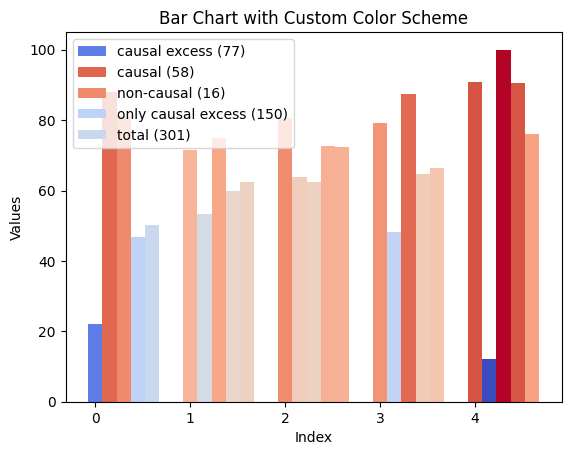

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Your list of dictionaries

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(result)

# Define the columns you want to plot
columns_to_plot = ['causal excess (77)', 'causal (58)', 'non-causal (16)', 'only causal excess (150)', 'total (301)']

columns_to_convert = df.columns[1:6]
df[columns_to_convert] = df[columns_to_convert].astype(float)

# Calculate the min and max values for these columns
min_val = df[columns_to_plot].min().min()
max_val = df[columns_to_plot].max().max()

# Create a color map based on normalization
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
cmap = plt.get_cmap('coolwarm')

# Plot a bar chart with custom colors
fig, ax = plt.subplots()
for i, col in enumerate(columns_to_plot):
    colors = [cmap(norm(value)) for value in df[col]]
    ax.bar(df.index + i * 0.15, df[col], width=0.15, label=col, color=colors)

ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Bar Chart with Custom Color Scheme')
ax.legend(columns_to_plot)
plt.show()


In [11]:
type(columns_to_convert)

pandas.core.indexes.base.Index

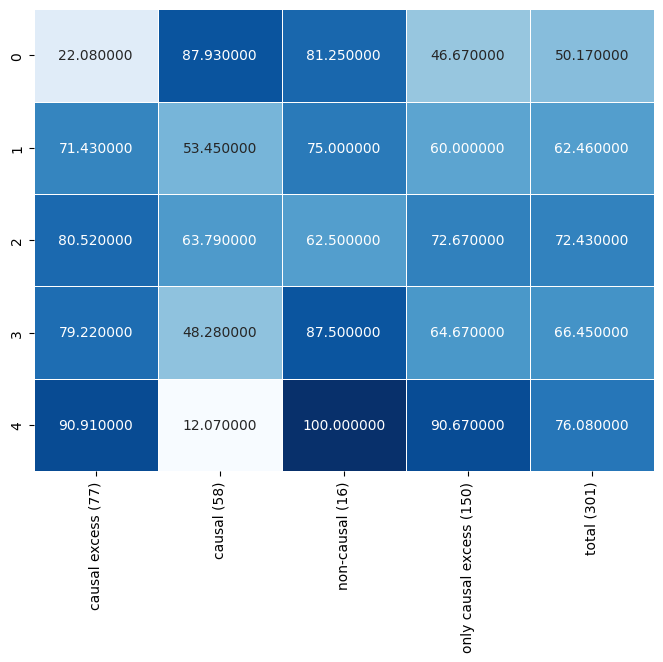

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个示例DataFrame

df = pd.DataFrame(result)

# 创建一个新的DataFrame，只包含第2到第6列
numeric_df = df.iloc[:, 1:]
columns_to_convert = df.columns[1:6]  # 获取第二到第六列的列名
numeric_df = numeric_df.astype(float).round(2)

# 设置每列的背景颜色
def color_max(s):
    is_max = s == s.max()
    return ['background-color: lightcoral' if v else '' for v in is_max]

styled_df = numeric_df.style.apply(color_max, axis=0)

# 可视化显示表格
styled_df.to_excel('table.xlsx', engine='openpyxl', index=False)
styled_df.to_html('table.html', index=False)

# 用Seaborn美化背景色
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df, annot=True, cmap='Blues', cbar=False, fmt='f', linewidths=0.5)
plt.show()

In [13]:
numeric_df

,causal excess (77),causal (58),non-causal (16),only causal excess (150),total (301)
0,22.08,87.93,81.25,46.67,50.17
1,71.43,53.45,75.00,60.00,62.46
2,80.52,63.79,62.50,72.67,72.43
3,79.22,48.28,87.50,64.67,66.45
4,90.91,12.07,100.00,90.67,76.08


/var/folders/dq/qsypqr855txgdmh1c4ff3t840000gn/T/ipykernel_68556/2313489682.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


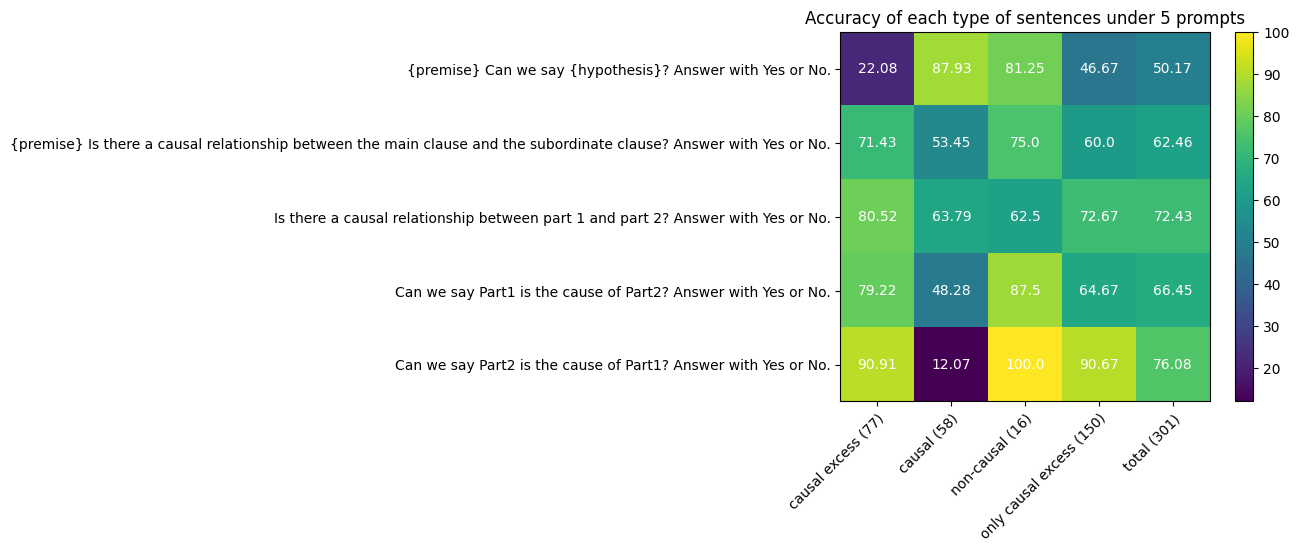

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

new_data = {
    'prompt': [item['prompt'] for item in result],
    'causal excess (77)': [float(item['causal excess (77)']) for item in result],
    'causal (58)': [round(float(item['causal (58)']), 2) for item in result],
    'non-causal (16)': [float(item['non-causal (16)']) for item in result],
    'only causal excess (150)': [float(item['only causal excess (150)']) for item in result],
    'total (301)': [float(item['total (301)']) for item in result]
}
# 这里是创建一个数据
prompt = new_data["prompt"]
types = ['causal excess (77)', 'causal (58)', 'non-causal (16)', 'only causal excess (150)','total (301)']

harvest = np.array([new_data["causal excess (77)"],
                    new_data['causal (58)'],
                    new_data['non-causal (16)'],
                    new_data['only causal excess (150)'],
                    new_data['total (301)']]).T

# 这里是创建一个画布
fig, ax = plt.subplots()
im = ax.imshow(harvest)

# 这里是修改标签
# We want to show all ticks...
ax.set_xticks(np.arange(len(types)))
ax.set_yticks(np.arange(len(prompt)))
# ... and label them with the respective list entries
ax.set_xticklabels(types)
ax.set_yticklabels(prompt)

# 因为x轴的标签太长了，需要旋转一下，更加好看
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# 添加每个热力块的具体数值
# Loop over data dimensions and create text annotations.
for i in range(len(prompt)):
    for j in range(len(types)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Accuracy of each type of sentences under 5 prompts")
fig.tight_layout()
plt.colorbar(im)

plt.savefig('heatmap_plot.png')
plt.show()

In [98]:
with open('result_15.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)

# Create new columns with default values
df['good'] = 0
df['bad'] = 0

# Define a function to set the values for "yes," "no," and "uncertain"
def set_values(row):
    answer = row['answer'].lower()
    if 'good' in answer:
        row['good'] = 1
    if 'bad' in answer:
        row['bad'] = 1
    return row

# Apply the function to each row
df = df.apply(set_values, axis=1)

# Filter rows where the sum is not equal to 1
filtered_df = df[df['good'] + df['bad'] != 1]

# Print the filtered DataFrame
print(filtered_df)

Empty DataFrame
Columns: [test, answer, label, good, bad]
Index: []


In [99]:
# Group the DataFrame by "label" and calculate the sum for each group
grouped_df = df.groupby('label').agg({'good': 'sum', 'bad': 'sum'}).reset_index()

# Calculate the total for each group
grouped_df['total'] = grouped_df['good'] + grouped_df['bad']

# Convert the grouped DataFrame to a JSON object
json_data = grouped_df.to_dict(orient='records')

# Save the JSON object to a file
import json
with open('distribution_14.json', 'w') as json_file:
    json.dump(json_data, json_file, indent=4)

# Print the JSON object
print(grouped_df)
print(json_data)

                label  good  bad  total
0              causal    43   10     53
1       causal excess    67    7     74
2          non-causal    16    5     21
3  only causal excess    83   17    100
[{'label': 'causal', 'good': 43, 'bad': 10, 'total': 53}, {'label': 'causal excess', 'good': 67, 'bad': 7, 'total': 74}, {'label': 'non-causal', 'good': 16, 'bad': 5, 'total': 21}, {'label': 'only causal excess', 'good': 83, 'bad': 17, 'total': 100}]


In [100]:
ground_truth = {"causal": "good", "causal excess": "good", "non-causal": "good", "only causal excess": "bad"}

In [101]:
import json

# Load the JSON data from the file
with open('distribution_14.json', 'r') as json_file:
    json_data = json.load(json_file)
    
for item in json_data:
    label = item['label']
    ground_truth_label = ground_truth.get(label)
    if ground_truth_label is not None:
        accuracy = item[ground_truth_label] / item['total']
        item['correct'] = ground_truth_label
        item['accuracy'] = accuracy

# Print the updated JSON data
print(json_data)
    
combined_data = {"ground_truth": ground_truth, "distribution_data": json_data}

# Save the combined data to a JSON file
with open('distribution_14.json', 'w') as json_file:
    json.dump(combined_data, json_file, indent=4)

[{'label': 'causal', 'good': 43, 'bad': 10, 'total': 53, 'correct': 'good', 'accuracy': 0.8113207547169812}, {'label': 'causal excess', 'good': 67, 'bad': 7, 'total': 74, 'correct': 'good', 'accuracy': 0.9054054054054054}, {'label': 'non-causal', 'good': 16, 'bad': 5, 'total': 21, 'correct': 'good', 'accuracy': 0.7619047619047619}, {'label': 'only causal excess', 'good': 83, 'bad': 17, 'total': 100, 'correct': 'bad', 'accuracy': 0.17}]


In [39]:
import json
import pandas as pd

dfs = []
# Load the JSON data from the file
for i in range(1,16):
    file_name = f"distribution_{i}.json"
    with open(file_name, 'r') as json_file:
        json_data = json.load(json_file)
    distr = json_data["distribution_data"] 
    gold = json_data["ground_truth"]
    print(i)

    
    df = pd.DataFrame(distr)
    df["accuracy"] = df['accuracy'].apply(lambda x: f"{x*100:.2f}")
    dfs.append(df)
    df.rename(columns={'correct': 'gold label'}, inplace=True)
#     df["gold_label"] = df["label"].map(gold)
#     print(df["gold_label"])
#     break
# # Concatenate them

for i, df in enumerate(dfs):
    df.insert(0, 'prompt_index', i)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_excel('combined_data.xlsx', index=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
